## __Titanic dataset__

`Source`: https://www.kaggle.com/datasets/waqi786/titanic-dataset

- PassengerID: Unique identifier for each passenger.
- Pclass: Passenger class (1st, 2nd, 3rd).
- Name: Full name of the passenger.
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Ticket number.
- Fare: Ticket fare.
- Cabin: Cabin number.
- Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).
- Survived: Survival status (0 = No; 1 = Yes).

__Usage:__
This dataset is ideal for practice in classification tasks, particularly for predicting binary outcomes such as survival status.

__Aim of the dataset:__ is to classify whether a person survived in Titanic or not.

In [399]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

### __Loading the dataset and checking the structure of the data__

- Finding missing values.
- Checking for categorical variables.
- Imputing the missing values with `mean` or `median` for numerical values.
- Imputing the missing values with `mode` for categorical values.
- Dropping columns which have too many missing values.

In [487]:
# Load the Titanic dataset from URL

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

In [488]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [491]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [493]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [495]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### __Observations:__

- Here, minimum and maximum values of `Age` ranges from 0.42 to 80.
- For that reason, we can find outliers in the dataset within the `Age` column.
- Hence, taking the mean value will not be proper because of the presence of outliers.
- We will use Median.

In [497]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [500]:
# Check for missing values

titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### __Observations:__

- Columns `Age`, `Cabin` and `Embarked` have missing values.
- `Age` is a numerical column.
- `Cabin` has too many missing values.
- `Sex`, `Embarked`, `Pclass` are categorical variables.

In [503]:
# Check the categories in the categorical variables.

titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [505]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [507]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

#### __Observations__

- For categorical variables, we will use the mode i.e. the category having highest count.
- For `Embarked`, it will be `S`.
- Since, `Cabin` has too many missing values, we can drop the column from the dataset.

In [510]:
titanic_df['Embarked'].mode()[0]

'S'

In [512]:
titanic_df['Age'].median()

28.0

In [514]:
# Handle missing values in Age by imputing the median

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [516]:
# Handle missing values in Embarked by imputing the mode

titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [518]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [520]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [522]:
# Since Cabin has too many missing values, we can drop the column
# Dropping Passengers, Name, Ticket column as its not needed

titanic_df.drop(columns = ['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)
titanic_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [524]:
# Drop rows with missing target values (Survived)

titanic_df.dropna(subset=['Survived'], inplace=True)

In [526]:
# Encode Categorical variables

label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

In [528]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### __Finding the outliers in the data using Box Plot__

- Finding the outliers in the dataset.
- Removing them.

<Axes: ylabel='Age'>

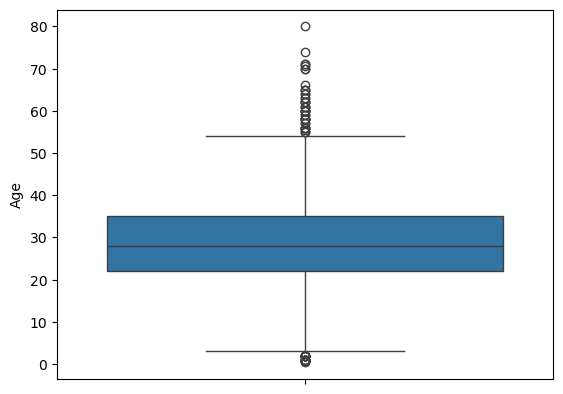

In [531]:
sns.boxplot(y = titanic_df["Age"])

<Axes: ylabel='Fare'>

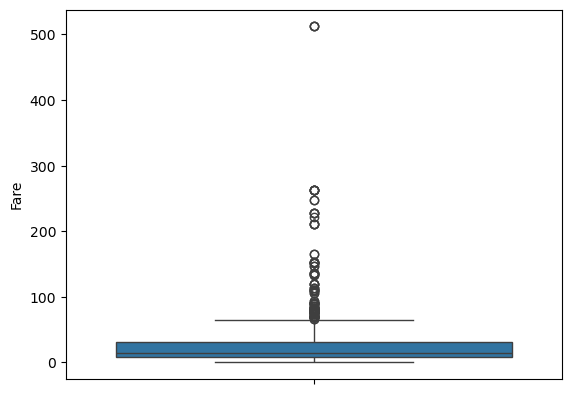

In [533]:
sns.boxplot(y = titanic_df["Fare"])

#### __Observations:__

- Here, `Age` and `Fare` contain outliers.

In [536]:
# Calculate Q1, Q3 and IQR For Fare

Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

7.9104 31.0 23.0896


In [538]:
# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR

outliers = titanic_df[(titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'fare':", len(outliers))

Number of outliers in 'fare': 116


In [540]:
# Removing outliers

titanic_df_clean = titanic_df[~((titanic_df['Fare'] < (Q1 - 1.5 * IQR)) | (titanic_df['Fare'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", titanic_df_clean.shape)

Data shape after outlier removal: (775, 8)


<Axes: ylabel='Fare'>

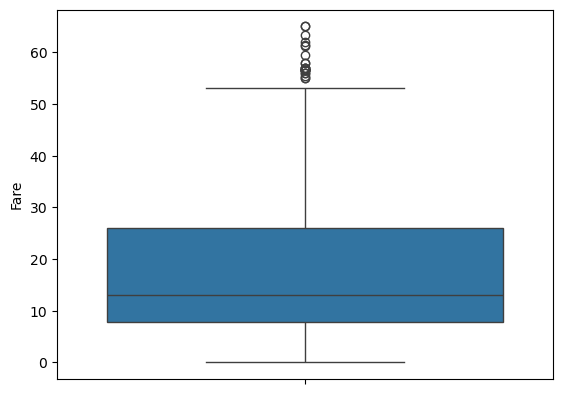

In [542]:
sns.boxplot(y = titanic_df_clean["Fare"])

In [544]:
# Calculate Q1, Q3 and IQR For Age

Q1 = titanic_df_clean['Age'].quantile(0.25)
Q3 = titanic_df_clean['Age'].quantile(0.75)
IQR = Q3 - Q1

print(Q1,Q3,IQR)

22.0 34.0 12.0


In [546]:
# Define outliers as those outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR

outliers = titanic_df_clean[(titanic_df_clean['Age'] < (Q1 - 1.5 * IQR)) | (titanic_df_clean['Age'] > (Q3 + 1.5 * IQR))]
print("Number of outliers in 'age':", len(outliers))

Number of outliers in 'age': 67


In [548]:
# Removing outliers

titanic_df_clean = titanic_df_clean[~((titanic_df_clean['Age'] < (Q1 - 1.5 * IQR)) | (titanic_df_clean['Age'] > (Q3 + 1.5 * IQR)))]
print("Data shape after outlier removal:", titanic_df_clean.shape)

Data shape after outlier removal: (708, 8)


<Axes: ylabel='Age'>

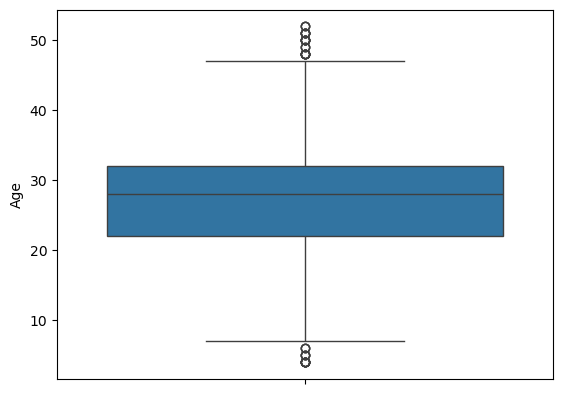

In [550]:
sns.boxplot(y = titanic_df_clean["Age"])

### __Performing Vertical and Horizontal split of the data and scaling the data__

In [553]:
X = titanic_df_clean.drop(columns = "Survived")
y = titanic_df_clean["Survived"]

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [557]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,28.0,0,0,26.55,2
784,3,1,25.0,0,0,7.05,2
83,1,1,28.0,0,0,47.10,2
17,2,1,28.0,0,0,13.00,2
323,2,0,22.0,1,1,29.00,2


In [559]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
147,3,0,9.0,2,2,34.3750,2
313,3,1,28.0,0,0,7.8958,2
417,2,0,18.0,0,2,13.0000,2
251,3,0,29.0,1,1,10.4625,2
766,1,1,28.0,0,0,39.6000,0


### __Scaling the dataset__

In [562]:
# Scale the numerical columns

scaler = StandardScaler()
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']

In [564]:
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

### __Model creation (Logistic Regression)__

In [246]:
# Setting up the Logistic Regression classifier

logistic_reg = LogisticRegression(random_state=42)
logistic_reg

LogisticRegression(random_state=42)

In [248]:
# Defining the parameters for GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'max_iter': [100, 500, 1000]
}

In [250]:
# Applying GridSearchCV for hyperparameter tuning

grid_search = GridSearchCV(estimator=logistic_reg, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             return_train_score=True, scoring='accuracy')

In [252]:
# Getting the best estimator

best_lr = grid_search.best_estimator_
best_lr

LogisticRegression(random_state=42)

In [254]:
y_pred_train_log_reg = best_lr.predict(X_train)
y_pred_test_log_reg = best_lr.predict(X_test)

y_pred_test_proba_log_reg = best_lr.predict_proba(X_test)[:,1]

In [256]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_log_reg,
    'Predicted Label': y_pred_test_log_reg,
})

# Display the first 5 instances in the result dataframe
results_df.head()

,Actual Label,Predicted Probability,Predicted Label
147,0,0.580382,1
313,0,0.091207,0
417,1,0.737514,1
251,0,0.454344,0
766,0,0.590084,1


In [258]:
# Calculate the training and testing accuracy

training_accuracy = accuracy_score(y_train, y_pred_train_log_reg)
testing_accuracy = accuracy_score(y_test, y_pred_test_log_reg)

print("Logistic Regression")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

Logistic Regression
Training Accuracy: 0.804040404040404
Testing Accuracy: 0.8028169014084507


In [260]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_test_log_reg))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       133
           1       0.78      0.66      0.72        80

    accuracy                           0.80       213
   macro avg       0.80      0.77      0.78       213
weighted avg       0.80      0.80      0.80       213



In [262]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test_log_reg)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[118,  15],
       [ 27,  53]])

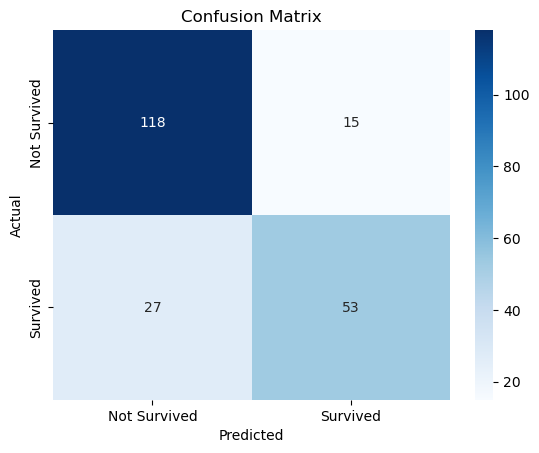

In [264]:
# Plotting the confusion matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [266]:
importance_of_features = best_lr.coef_
importance_of_features = importance_of_features.flatten()
importance_of_features

array([-0.80500622, -2.52343716, -0.25703707, -0.2082639 , -0.14319707,
        0.21400026, -0.27131443])

In [268]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [270]:
# Create a dataframe for the coefficients and the respective columns

df_lg = pd.DataFrame(importance_of_features, X.columns)
df_lg

,0
Pclass,-0.805006
Sex,-2.523437
Age,-0.257037
SibSp,-0.208264
Parch,-0.143197
Fare,0.214000
Embarked,-0.271314


In [272]:
# AUC-ROC Curve

auc = roc_auc_score(y_test, y_pred_test_proba_log_reg)
auc

0.849859022556391

In [276]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_log_reg)

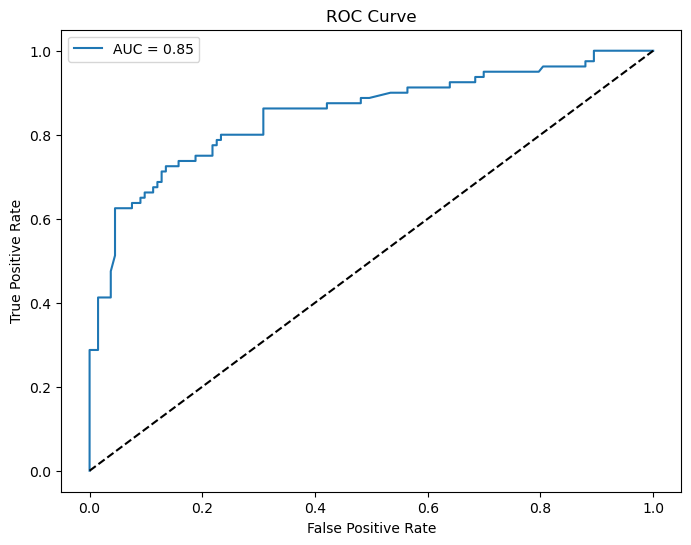

In [278]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [280]:
# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

Best parameters found by GridSearchCV:
{'max_iter': 100, 'penalty': 'l2'}


In [282]:
# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
results

All parameter combinations and their scores:


,params,mean_test_score,std_test_score,rank_test_score
1,"{'max_iter': 100, 'penalty': 'l2'}",0.793939,0.044536,1
5,"{'max_iter': 500, 'penalty': 'l2'}",0.793939,0.044536,1
9,"{'max_iter': 1000, 'penalty': 'l2'}",0.793939,0.044536,1
3,"{'max_iter': 100, 'penalty': None}",0.791919,0.044992,4
7,"{'max_iter': 500, 'penalty': None}",0.791919,0.044992,4
11,"{'max_iter': 1000, 'penalty': None}",0.791919,0.044992,4
0,"{'max_iter': 100, 'penalty': 'l1'}",NaN,NaN,7
2,"{'max_iter': 100, 'penalty': 'elasticnet'}",NaN,NaN,7
4,"{'max_iter': 500, 'penalty': 'l1'}",NaN,NaN,7
6,"{'max_iter': 500, 'penalty': 'elasticnet'}",NaN,NaN,7


### __Model creation (Naive bayes)__

In [285]:
# Import Required Libraries and apply Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

In [287]:
# Setting up the Naive Bayes classifier

nb_model = GaussianNB()
nb_model

GaussianNB()

In [289]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [291]:
# Predict on the training and testing set
y_pred_train_nb = nb_model.predict(X_train)
y_pred_test_nb = nb_model.predict(X_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_nb)
testing_accuracy = accuracy_score(y_test, y_pred_test_nb)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_test_proba_nb = nb_model.predict_proba(X_test)[:, 1]


Naïve Bayes:
Training Accuracy: 0.7717171717171717
Testing Accuracy: 0.8169014084507042


In [293]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_nb,
    'Predicted Label': y_pred_test_nb,
})

# Display the first 5 instances in the result dataframe
results_df.head()

,Actual Label,Predicted Probability,Predicted Label
147,0,0.703001,1
313,0,0.042125,0
417,1,0.795292,1
251,0,0.609552,1
766,0,0.924427,1


In [295]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_test_nb))

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       133
           1       0.74      0.80      0.77        80

    accuracy                           0.82       213
   macro avg       0.80      0.81      0.81       213
weighted avg       0.82      0.82      0.82       213



In [297]:
cm_nb = confusion_matrix(y_test, y_pred_test_nb)
print("Confusion Matrix:")
cm_nb

Confusion Matrix:


array([[110,  23],
       [ 16,  64]])

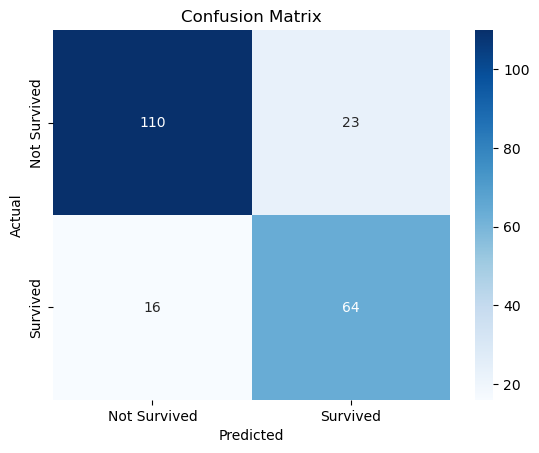

In [299]:
# Plotting the confusion matrix

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [301]:
auc = roc_auc_score(y_test, y_pred_test_proba_nb)
auc

0.837922932330827

In [303]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_nb)

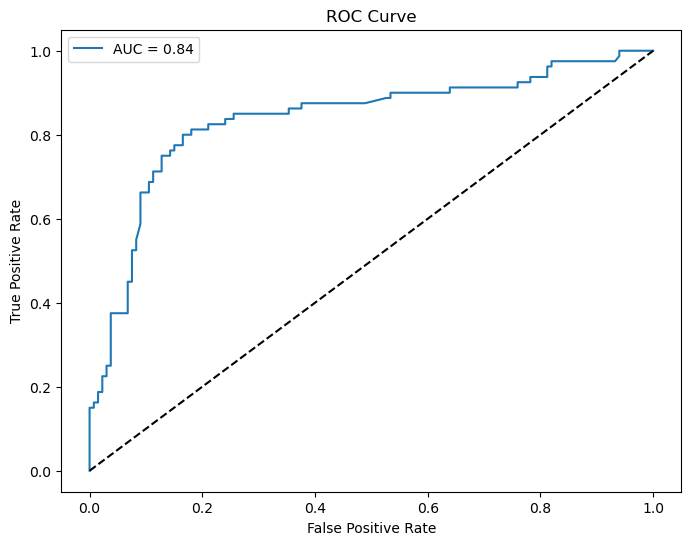

In [305]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### __Model creation (KNN)__

In [314]:
# Import Required Libraries and apply K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

In [483]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,-0.045432,-0.482850,-0.395708,0.719961,2
784,3,1,-0.362924,-0.482850,-0.395708,-0.747714,2
83,1,1,-0.045432,-0.482850,-0.395708,2.266665,2
17,2,1,-0.045432,-0.482850,-0.395708,-0.299885,2
323,2,0,-0.680416,0.700372,0.828513,0.904361,2


In [367]:
normalizer = Normalizer()

In [369]:
X_train[numerical_columns] = normalizer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = normalizer.transform(X_test[numerical_columns])

In [485]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
507,1,1,-0.045432,-0.482850,-0.395708,0.719961,2
784,3,1,-0.362924,-0.482850,-0.395708,-0.747714,2
83,1,1,-0.045432,-0.482850,-0.395708,2.266665,2
17,2,1,-0.045432,-0.482850,-0.395708,-0.299885,2
323,2,0,-0.680416,0.700372,0.828513,0.904361,2


In [385]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model

# Define the pipeline
pipeline_knn = Pipeline([
    ('normalizer', Normalizer()),
    ('scaler', StandardScaler()),
    ('log_reg', KNeighborsClassifier(max_iter=10000, random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [387]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [389]:
# Predict on the training and testing set
y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

# Calculate the training and testing accuracy
training_accuracy = accuracy_score(y_train, y_pred_train_knn)
testing_accuracy = accuracy_score(y_test, y_pred_test_knn)
print("\nNaïve Bayes:")
print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")

y_pred_test_proba_knn = knn_model.predict_proba(X_test)[:, 1]


Naïve Bayes:
Training Accuracy: 0.8787878787878788
Testing Accuracy: 0.7887323943661971


In [391]:
results_df = pd.DataFrame({
    'Actual Label': y_test,
    'Predicted Probability': y_pred_test_proba_knn,
    'Predicted Label': y_pred_test_knn,
})

# Display the first 5 instances in the result dataframe
results_df.head()

,Actual Label,Predicted Probability,Predicted Label
147,0,0.333333,0
313,0,0.000000,0
417,1,1.000000,1
251,0,0.333333,0
766,0,0.333333,0


In [393]:
# Printing the classification report

print("Classification Report:")
print(classification_report(y_test, y_pred_test_knn))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       133
           1       0.82      0.56      0.67        80

    accuracy                           0.79       213
   macro avg       0.80      0.74      0.76       213
weighted avg       0.79      0.79      0.78       213



In [395]:
cm_knn = confusion_matrix(y_test, y_pred_test_knn)
print("Confusion Matrix:")
cm_knn

Confusion Matrix:


array([[123,  10],
       [ 35,  45]])

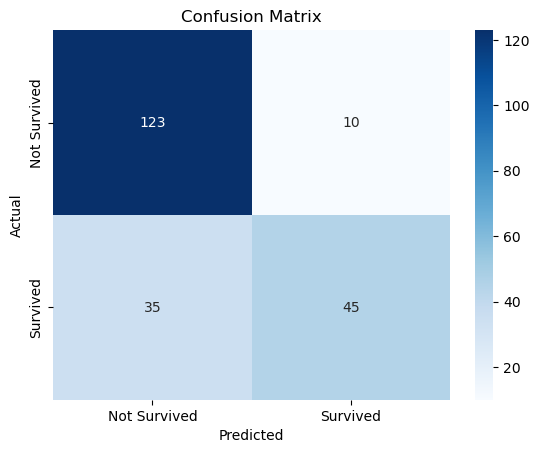

In [397]:
# Plotting the confusion matrix

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [359]:
auc = roc_auc_score(y_test, y_pred_test_proba_knn)
auc

0.8433270676691729

In [361]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_proba_knn)

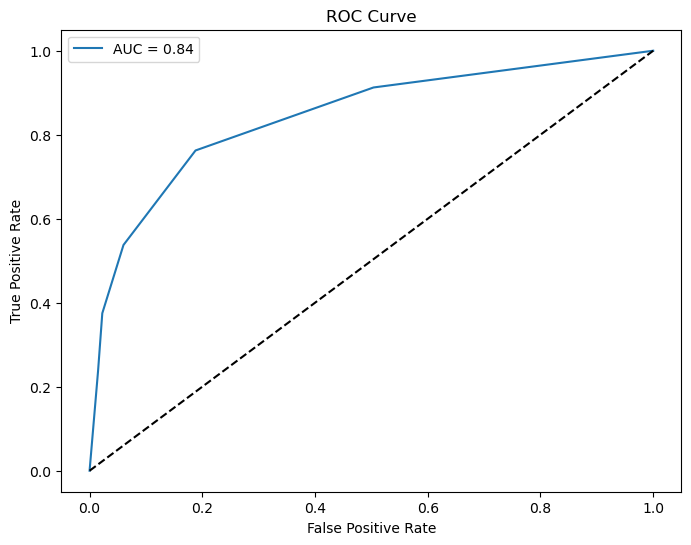

In [363]:
# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Decision Trees

In [78]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Setting up the Decision Tree classifier
# dtc = DecisionTreeClassifier(random_state=42)

# # Defining the parameters for GridSearchCV
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'auto', 'sqrt', 'log2']
# }

# # Applying GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
# grid_search.fit(X_train, y_train)

# # Getting the best estimator
# best_dtc = grid_search.best_estimator_

# # Making predictions
# y_pred = best_dtc.predict(X_test)
# y_pred_proba = best_dtc.predict_proba(X_test)[:, 1]

# # Calculating accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

# # Printing the classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # AUC-ROC
# auc = roc_auc_score(y_test, y_pred_proba)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

# # Printing the best parameters
# print("Best parameters found by GridSearchCV:")
# print(grid_search.best_params_)

# # Displaying all parameter combinations and their scores
# results = pd.DataFrame(grid_search.cv_results_)
# print("All parameter combinations and their scores:")
# results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
# results = results.sort_values(by='rank_test_score')
# print(results)


# Niave Bayes

Accuracy: 81.69%
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       133
           1       0.74      0.80      0.77        80

    accuracy                           0.82       213
   macro avg       0.80      0.81      0.81       213
weighted avg       0.82      0.82      0.82       213

Confusion Matrix:
[[110  23]
 [ 16  64]]


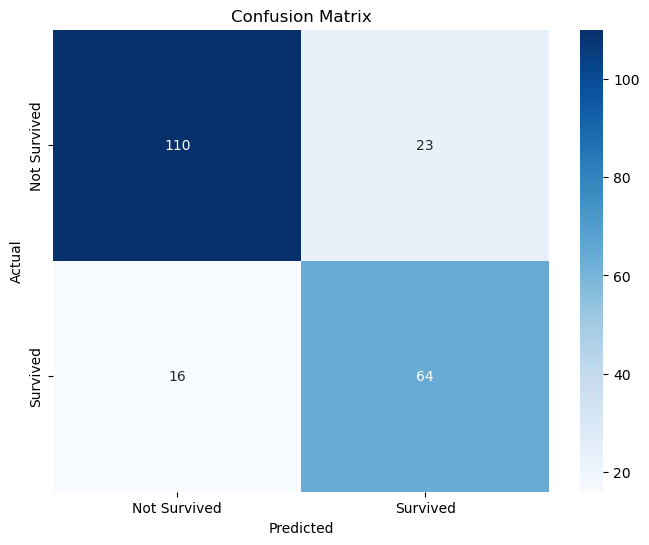

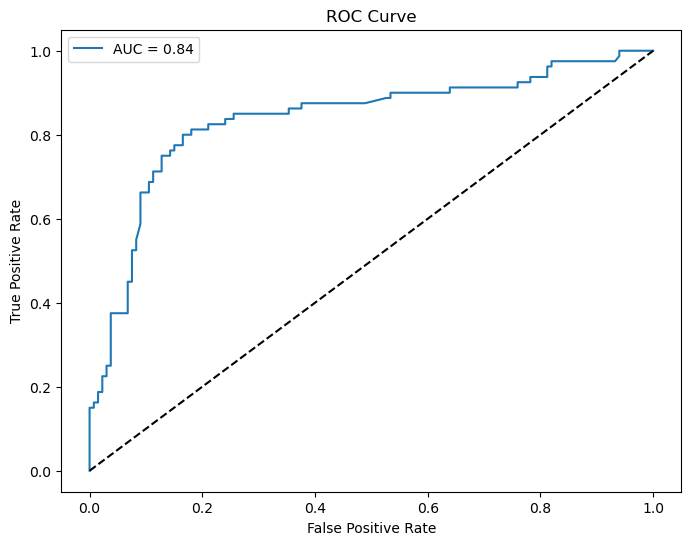

In [307]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Setting up the Naive Bayes classifier
# nb = GaussianNB()

# # Training the Naive Bayes classifier
# nb.fit(X_train, y_train)

# # Making predictions
# y_pred = nb.predict(X_test)
# y_pred_proba = nb.predict_proba(X_test)[:, 1]

# # Calculating accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

# # Printing the classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # AUC-ROC
# auc = roc_auc_score(y_test, y_pred_proba)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()


# Support Vector Machine

Accuracy: 80.28%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       133
           1       0.80      0.64      0.71        80

    accuracy                           0.80       213
   macro avg       0.80      0.77      0.78       213
weighted avg       0.80      0.80      0.80       213

Confusion Matrix:
[[120  13]
 [ 29  51]]


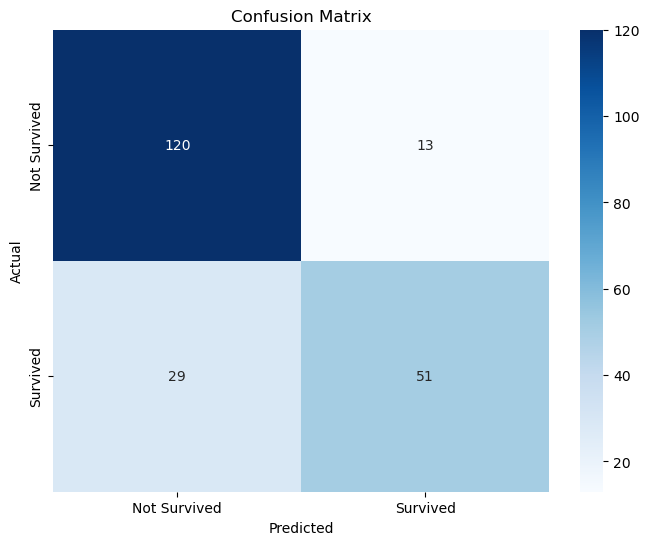

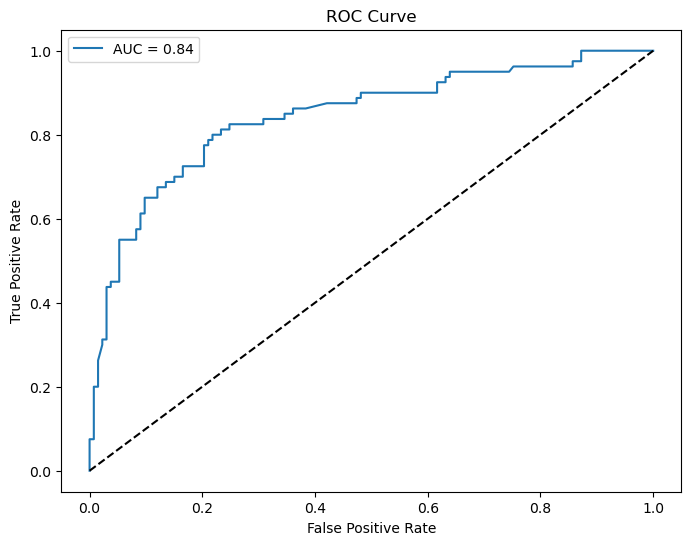

Best parameters found by GridSearchCV:
{'C': 1, 'coef0': 0.0, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}
All parameter combinations and their scores:
                                                params  mean_test_score  \
106  {'C': 1, 'coef0': 0.1, 'degree': 4, 'gamma': '...         0.795979   
122  {'C': 1, 'coef0': 0.5, 'degree': 3, 'gamma': '...         0.795979   
82   {'C': 1, 'coef0': 0.0, 'degree': 4, 'gamma': '...         0.795979   
130  {'C': 1, 'coef0': 0.5, 'degree': 4, 'gamma': '...         0.795979   
90   {'C': 1, 'coef0': 0.0, 'degree': 5, 'gamma': '...         0.795979   
..                                                 ...              ...   
263  {'C': 100, 'coef0': 0.1, 'degree': 5, 'gamma':...         0.478704   
255  {'C': 100, 'coef0': 0.1, 'degree': 4, 'gamma':...         0.478704   
239  {'C': 100, 'coef0': 0.0, 'degree': 5, 'gamma':...         0.478696   
223  {'C': 100, 'coef0': 0.0, 'degree': 3, 'gamma':...         0.478696   
231  {'C': 100, 'coe

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the Support Vector Machine classifier
svm = SVC(probability=True, random_state=42)

# Defining the parameters for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [3, 4, 5],  # Degree for poly kernel
    'coef0': [0.0, 0.1, 0.5]  # Independent term in kernel function
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=2, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_svm = grid_search.best_estimator_

# Making predictions
y_pred = best_svm.predict(X_test)
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
print(results)


# Random Forest Classifier

Accuracy: 80.75%
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       133
           1       0.88      0.56      0.69        80

    accuracy                           0.81       213
   macro avg       0.83      0.76      0.77       213
weighted avg       0.82      0.81      0.80       213

Confusion Matrix:
[[127   6]
 [ 35  45]]


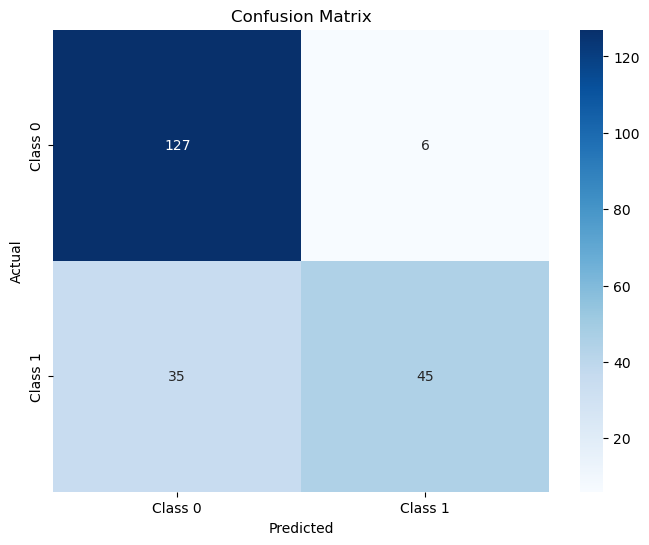

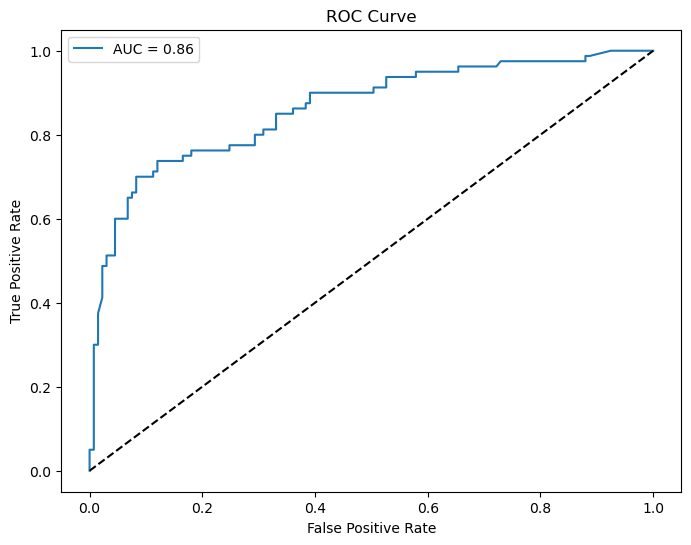

Best parameters found by GridSearchCV:
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 300}
All parameter combinations and their scores:
                                               params  mean_test_score  \
20  {'criterion': 'entropy', 'max_depth': 10, 'n_e...         0.810101   
3   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.810101   
18  {'criterion': 'entropy', 'max_depth': 10, 'n_e...         0.810101   
4   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.808081   
19  {'criterion': 'entropy', 'max_depth': 10, 'n_e...         0.806061   
5   {'criterion': 'gini', 'max_depth': 10, 'n_esti...         0.806061   
0   {'criterion': 'gini', 'max_depth': None, 'n_es...         0.789899   
6   {'criterion': 'gini', 'max_depth': 20, 'n_esti...         0.789899   
9   {'criterion': 'gini', 'max_depth': 30, 'n_esti...         0.789899   
12  {'criterion': 'gini', 'max_depth': 40, 'n_esti...         0.789899   
13  {'criterion': 'gini', 'max_depth': 

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Defining the parameters for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False]
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_rfc = grid_search.best_estimator_

# Making predictions
y_pred = best_rfc.predict(X_test)
y_pred_proba = best_rfc.predict_proba(X_test)[:, 1]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
print(results)


# AdaBoost

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

Accuracy: 83.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       133
           1       0.87      0.65      0.74        80

    accuracy                           0.83       213
   macro avg       0.84      0.79      0.81       213
weighted avg       0.84      0.83      0.82       213

Confusion Matrix:
[[125   8]
 [ 28  52]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


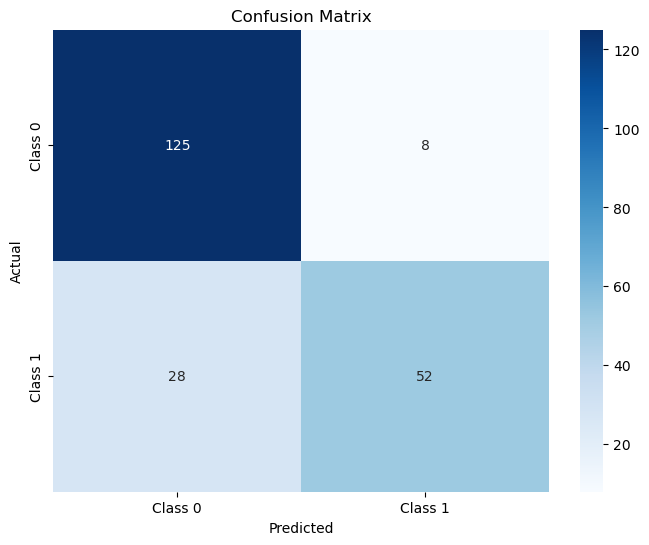

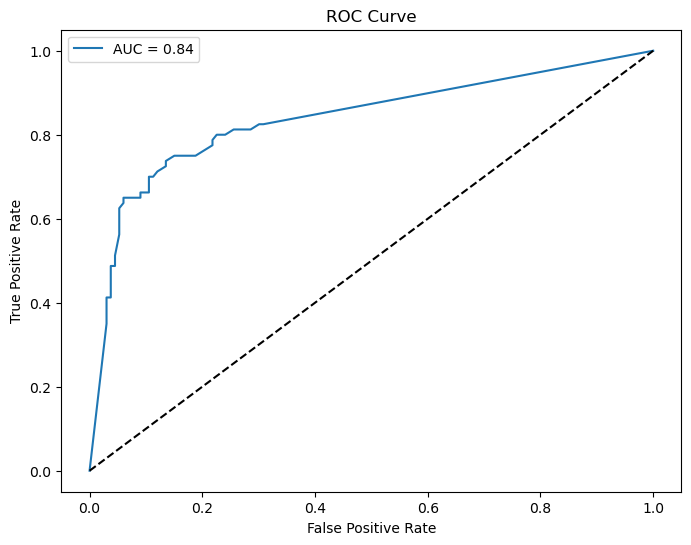

Best parameters found by GridSearchCV:
{'learning_rate': 0.01, 'n_estimators': 50}
All parameter combinations and their scores:
                                          params  mean_test_score  \
0    {'learning_rate': 0.01, 'n_estimators': 50}         0.775758   
6       {'learning_rate': 1, 'n_estimators': 50}         0.771717   
1   {'learning_rate': 0.01, 'n_estimators': 100}         0.771717   
2   {'learning_rate': 0.01, 'n_estimators': 200}         0.769697   
10    {'learning_rate': 10, 'n_estimators': 100}         0.769697   
11    {'learning_rate': 10, 'n_estimators': 200}         0.769697   
4    {'learning_rate': 0.1, 'n_estimators': 100}         0.769697   
3     {'learning_rate': 0.1, 'n_estimators': 50}         0.767677   
8      {'learning_rate': 1, 'n_estimators': 200}         0.767677   
7      {'learning_rate': 1, 'n_estimators': 100}         0.765657   
5    {'learning_rate': 0.1, 'n_estimators': 200}         0.763636   
9      {'learning_rate': 10, 'n_estimators':

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the AdaBoost classifier
base_estimator = DecisionTreeClassifier(random_state=42)
abc = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Defining the parameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10],
#     'estimator__criterion': ['gini', 'entropy'],
#     'estimator__splitter': ['best', 'random'],
#     'estimator__max_depth': [None, 10, 20, 30],
#     'estimator__min_samples_split': [2, 5, 10],
#     'estimator__min_samples_leaf': [1, 2, 4]
}

# Applying GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Getting the best estimator
best_abc = grid_search.best_estimator_

# Making predictions
y_pred = best_abc.predict(X_test)
y_pred_proba = best_abc.predict_proba(X_test)[:, 1]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# AUC-ROC
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Printing the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Displaying all parameter combinations and their scores
results = pd.DataFrame(grid_search.cv_results_)
print("All parameter combinations and their scores:")
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
results = results.sort_values(by='rank_test_score')
print(results)


# Stacking

Accuracy: 82.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       133
           1       0.89      0.60      0.72        80

    accuracy                           0.82       213
   macro avg       0.84      0.78      0.79       213
weighted avg       0.83      0.82      0.81       213

Confusion Matrix:
[[127   6]
 [ 32  48]]


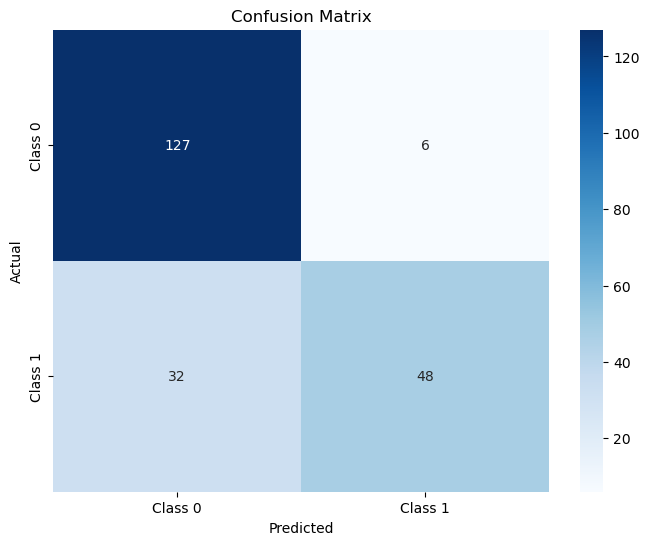

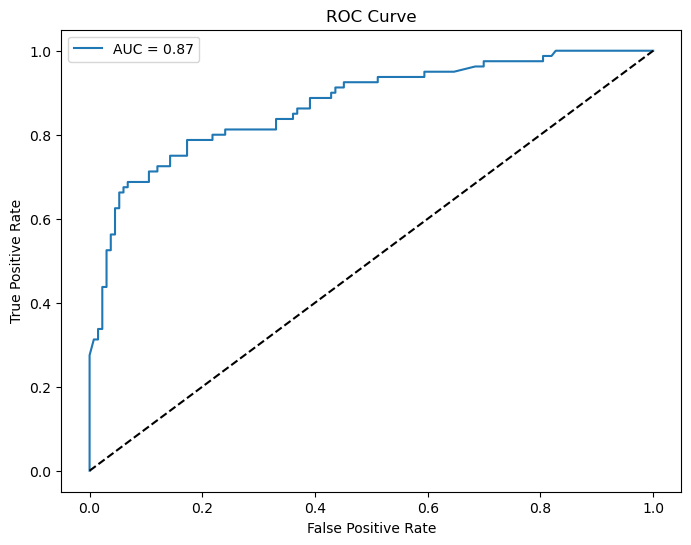

Best parameters found by GridSearchCV:
{}
All parameter combinations and their scores:
  params  mean_test_score  std_test_score  rank_test_score
0     {}         0.820202        0.028138                1


In [88]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.ensemble import StackingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Defining base learners
# base_learners = [
#     ('lr', LogisticRegression()),
#     ('dt', DecisionTreeClassifier()),
#     ('svc', SVC(probability=True)),
#     ('rf', RandomForestClassifier())
# ]

# # Defining the meta-learner
# meta_learner = LogisticRegression()

# # Setting up the Stacking classifier
# stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# # Applying GridSearchCV for hyperparameter tuning
# param_grid = {
# #     'lr__C': [0.1, 1, 10],
# #     'dt__criterion': ['gini', 'entropy'],
# #     'svc__C': [0.1, 1, 10],
# #     'rf__n_estimators': [100, 200],
# #     'rf__max_depth': [None, 10, 20]
# }

# grid_search = GridSearchCV(estimator=stacking_clf, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Getting the best estimator
# best_stacking_clf = grid_search.best_estimator_

# # Making predictions
# y_pred = best_stacking_clf.predict(X_test)
# y_pred_proba = best_stacking_clf.predict_proba(X_test)[:, 1]

# # Calculating accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy * 100:.2f}%')

# # Printing the classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(cm)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()

# # AUC-ROC
# auc = roc_auc_score(y_test, y_pred_proba)
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend()
# plt.show()

# # Printing the best parameters
# print("Best parameters found by GridSearchCV:")
# print(grid_search.best_params_)

# # Displaying all parameter combinations and their scores
# results = pd.DataFrame(grid_search.cv_results_)
# print("All parameter combinations and their scores:")
# results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
# results = results.sort_values(by='rank_test_score')
# print(results)
